<a href="https://colab.research.google.com/github/annisakrnn/PCVK_Genap_2025/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
import cv2 as cv
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import numpy as np

Mengubah tingkat kecerahan citra
---------------------------------
Masukkan nilai kecerahan: 50


/tmp/ipython-input-3765504775.py:15: RuntimeWarning: overflow encountered in scalar add
  brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)


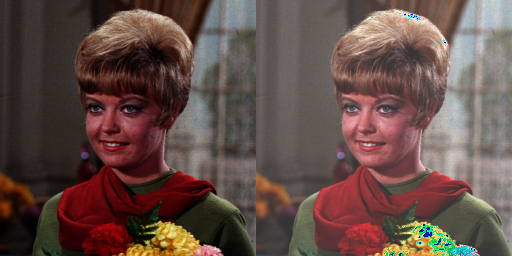

In [88]:
print('Mengubah tingkat kecerahan citra')
print('---------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# TUGAS PRAKTIKUM D1

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:  

Implementasi Inverse Citra
--------------------------


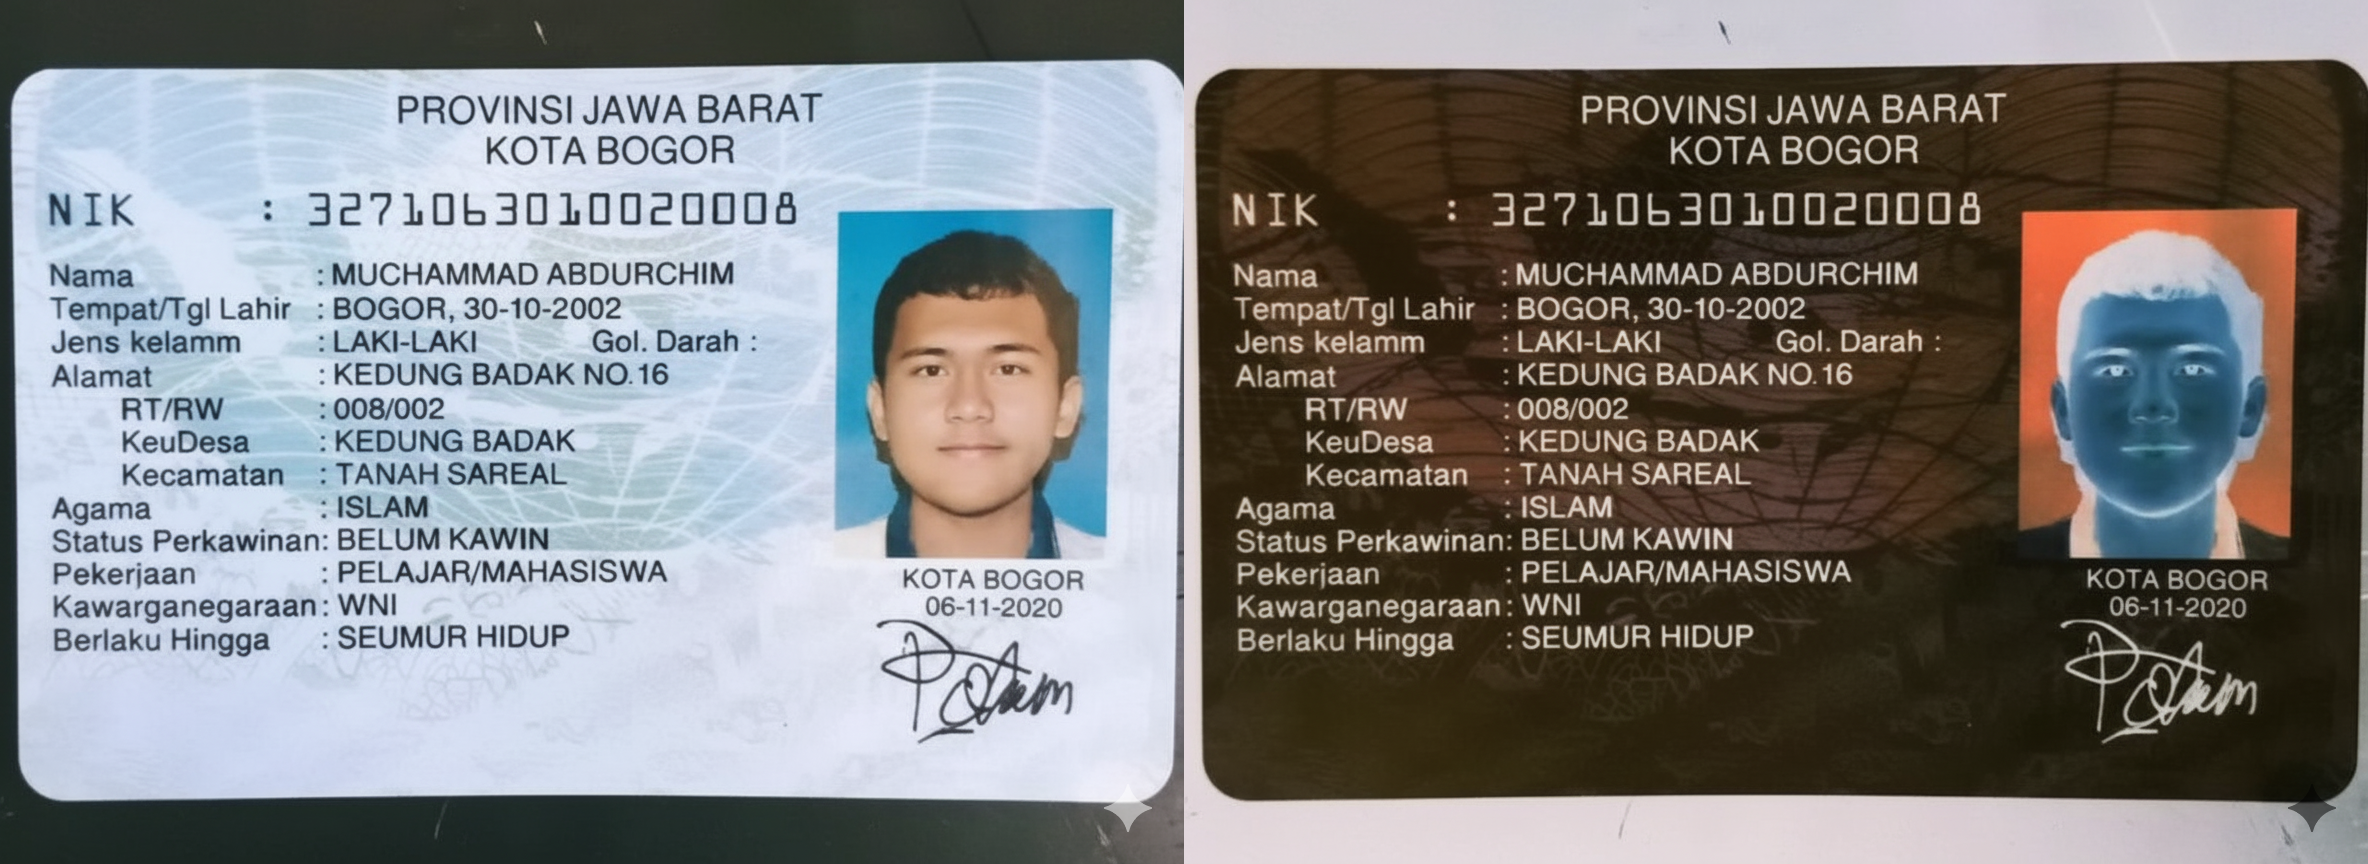

Inverse citra berhasil dibuat dan ditampilkan.


In [89]:
print('Implementasi Inverse Citra')
print('--------------------------')

# Baca gambar original
original = cv2.imread('/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/KTP_OHIM.png')

if original is None:
    print('Error: Gambar tidak ditemukan. Periksa path file.')
else:
    # Inisialisasi array untuk inverse image (sama ukuran dan tipe dengan original)
    inverse_image = np.zeros(original.shape, original.dtype)

    # Akses per piksel dan terapkan formula inverse: s = 255 - r
    for y in range(original.shape[0]):
        for x in range(original.shape[1]):
            for c in range(original.shape[2]):  # 3 untuk RGB
                r = original[y, x, c]  # Intensitas asli
                s = 255 - r  # Formula inverse
                inverse_image[y, x, c] = s

    # Tampilkan side-by-side: original | inverse
    final_frame = cv2.hconcat((original, inverse_image))
    cv2_imshow(final_frame)

    print('Inverse citra berhasil dibuat dan ditampilkan.')

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:


Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


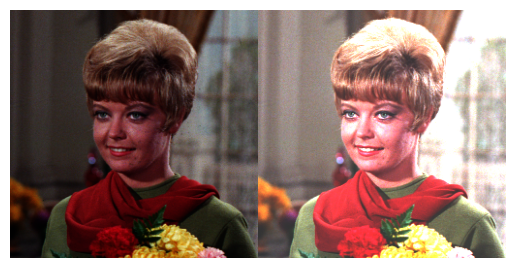

In [90]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------------------')

image = cv2.imread('/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/female.tiff')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Input dari user
brightness = int(input("Masukkan tingkat kecerahan [-255 - 255]: "))
contrast = float(input("Masukkan kontras [1.0 - 3.0]: "))

# Terapkan transformasi
output = cv2.convertScaleAbs(image, alpha=contrast, beta=brightness)

plt.subplot(1,2,1)
plt.imshow(image)
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(output)
plt.axis("off")
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()


3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

Mengubah kontras dengan Transformasi Log
----------------------------------------
Masukkan nilai kecerahan: 3


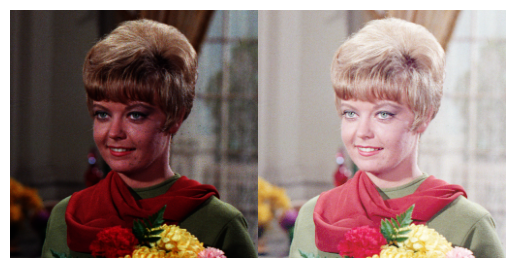

In [91]:
print('Mengubah kontras dengan Transformasi Log')
print('----------------------------------------')

image = cv2.imread('/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/female.tiff')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# input kecerahan
brightness = int(input("Masukkan nilai kecerahan: "))

# transformasi Log
image_float = image.astype(np.float32)
c = 255 / np.log(1 + np.max(image_float))
log_transformed = c * np.log(1 + image_float)

# tambah brightness
output = np.clip(log_transformed + brightness, 0, 255).astype(np.uint8)


plt.subplot(1,2,1)
plt.imshow(image)
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(output)
plt.axis("off")

# jarak antar gambar
plt.subplots_adjust(wspace=0, hspace=0)

plt.show()


4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

a. Averaging

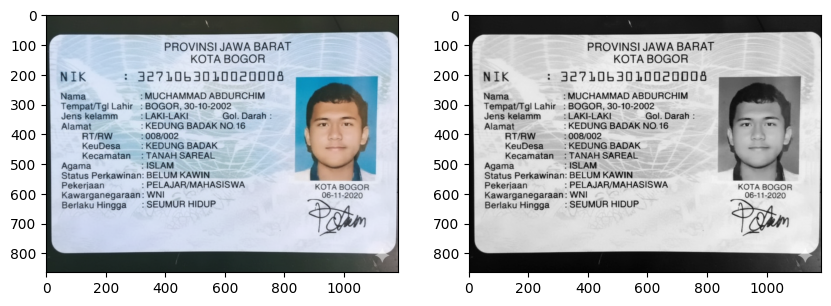

In [92]:
image = cv2.imread('/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/KTP_OHIM.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# konversi gambar ke grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# membuat canvas figure
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image)
# plt.axis("on")

plt.subplot(1,2,2)
plt.imshow(gray, cmap="gray")
# plt.axis("on")

plt.show()


b. Lightness

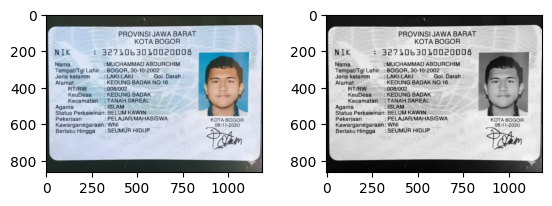

In [93]:
image = cv2.imread('/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/KTP_OHIM.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# konversi gambar ke grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# gambar asli
plt.subplot(1,2,1)
plt.imshow(image)
# axis default (ada angka + garis tepi)

# gambar grayscale
plt.subplot(1,2,2)
plt.imshow(gray, cmap="gray")
# axis default (ada angka + garis tepi)

# atur jarak antar gambar
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()


c. Luminance

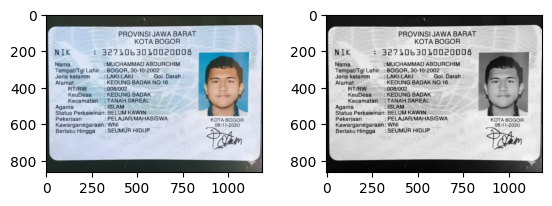

In [94]:
image = cv2.imread('/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/KTP_OHIM.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# konversi gambar ke grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# gambar asli
plt.subplot(1,2,1)
plt.imshow(image)
# axis default (ada angka + garis tepi)

# gambar grayscale
plt.subplot(1,2,2)
plt.imshow(gray, cmap="gray")
# axis default (ada angka + garis tepi)

# atur jarak antar gambar
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()


5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

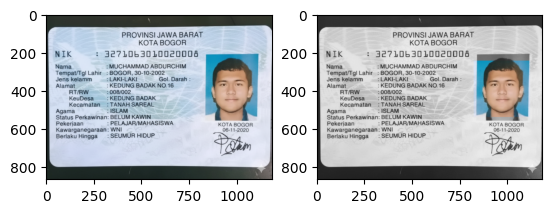

In [95]:
image = cv2.imread('/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/KTP_OHIM.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# konversi gambar ke grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# load haar cascade untuk deteksi wajah
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# mendeteksi wajah
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# mengubah KTP jadi grayscale 3 channel
gray_3ch = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
ktp_mixed = gray_3ch.copy()

# menempelkan bagian wajah berwarna
for (x, y, w, h) in faces:
    # menambah margin sedikit supaya kotaknya pas dengan area foto
    margin = 40
    x1, y1 = max(0, x - margin), max(0, y - margin)
    x2, y2 = min(image.shape[1], x + w + margin), min(image.shape[0], y + h + margin)

    # menmpelkan area foto dari gambar asli
    ktp_mixed[y1:y2, x1:x2] = image[y1:y2, x1:x2]

# hasil
plt.subplot(1,2,1)
plt.imshow(image)

plt.subplot(1,2,2)
plt.imshow(ktp_mixed)

plt.show()


# TUGAS PRAKTIKUM D2: Operasi Aritmatika dan Logika

1. Buat Gamma Correction sesuai dengan petunjuk berikut

Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.

Gamma Correction pada citra
---------------------------
Masukkan nilai Gamma: 3


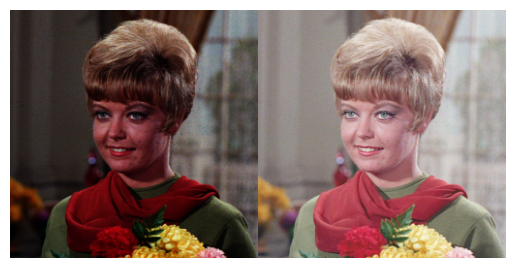

In [96]:
print('Gamma Correction pada citra')
print('---------------------------')

# Baca gambar
image = cv2.imread('/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/female.tiff')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

try:
    gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, input harus berupa angka!')
    gamma = 1.0

# normalisasi nilai pixel [0,1], lalu gamma correction
gamma_corrected = np.array(255 * (image / 255) ** (1/gamma), dtype='uint8')

plt.subplot(1,2,1)
plt.imshow(image)
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(gamma_corrected)
plt.axis("off")

plt.subplots_adjust(wspace=0, hspace=0)

plt.show()


2. Buat Simulasi Image Depth

Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi
citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit).
Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0
(000 0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit.
Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst.
Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra,
silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh
pada Gambar.

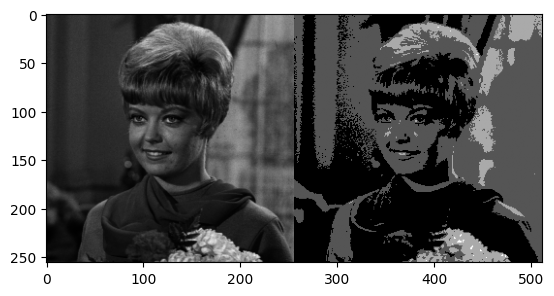

In [97]:
# mengatur bit depth
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

# membaca gambar grayscale
original = cv.imread('/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/female.tiff',
                     cv.IMREAD_GRAYSCALE)

# perhitungan kuantisasi
quantized = np.round(original / level) * level
quantized = np.uint8(quantized)

# menggabungkan citra asli dan hasil kuantisasi secara horizontal
combined = np.hstack((original, quantized))

# Tampilkan dengan satu koordinat
plt.imshow(combined, cmap='gray')
plt.axis("on")
plt.show()


3. Buat modul Average Denoising

Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.  

Citra asli sudah disediakan pada /images/galaxy.jpg.

100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg

Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import glob
from math import log10, sqrt

# Fungsi PSNR manual
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Baca semua citra noisy
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_28/Images/noises/*.jpg'):
    n = cv.imread(img)
    if n is not None:
        cv_img.append(n)

cv_img = np.array(cv_img, dtype=np.float32)
print("Jumlah citra noisy terbaca:", len(cv_img))

# Baca citra asli (ground truth) → sesuaikan path
original = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_28/Images/galaxy.jpg')
if original is None:
    raise FileNotFoundError("Citra original (galaxy.jpg) tidak ditemukan!")

# Samakan ukuran
h, w, c = original.shape
cv_img = np.array([cv.resize(img, (w, h)) for img in cv_img], dtype=np.float32)

jumlah_citra = [10, 20, 40, 80, 100]
hasil_psnr = []

plt.figure(figsize=(15,6))

for i, n_citra in enumerate(jumlah_citra, 1):
    # Average denoising
    avg = np.mean(cv_img[:n_citra], axis=0)
    avg = np.uint8(avg)

    # Hitung PSNR terhadap original
    psnr_val = PSNR(original, avg)
    hasil_psnr.append([n_citra, psnr_val])

    ax = plt.subplot(2, len(jumlah_citra)//2, i)
    ax.imshow(cv.cvtColor(avg, cv.COLOR_BGR2RGB))
    ax.set_title(f"{n_citra} citra\nPSNR={psnr_val:.2f} dB", fontsize=9)
    ax.axis("off")

plt.suptitle("Average Denoising & PSNR", fontsize=14)
plt.tight_layout()
plt.show()

print("Hasil PSNR:")
for n, psnr in hasil_psnr:
    print(f"{n} citra → {psnr:.2f} dB")


4. Buat image masking

Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff)

Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.


